In [1]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Loading data
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [5]:
# Check dataset balance
df["MYOPIC"].value_counts(normalize=True)

0    0.868932
1    0.131068
Name: MYOPIC, dtype: float64

In [6]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


## K-Means with PCA
1.  Use all X values 
1.  Dimension Reduction with PCA
1.  K-Means Clustering

In [64]:
# Standarize data with StandarScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


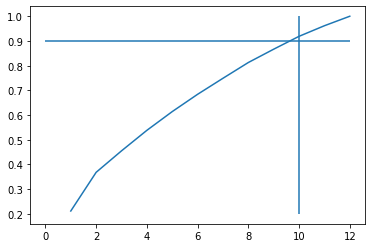

In [65]:
# Note:  there are 14 independent variables and one dependent variable 
variance_explained = np.arange(0.1, 1.0, 0.01)
components =[]
sum_components=[]
for i in variance_explained:
    
    # Initialize PCA model
    pca = PCA(n_components=i)
    
    # Get two principal components.
    X_pca = pca.fit_transform(X_scaled)
    
    # variance explained
    sum_components.append(pca.explained_variance_ratio_.sum())
    
    # number of principle components
    components.append(len(pca.explained_variance_ratio_))
    
plt.plot(components, sum_components)
plt.hlines(0.9,0,12)
plt.vlines(10, 0.2, 1)

In [66]:
 # Initialize PCA model components explaining about 90% variance
pca = PCA(n_components=10)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915191

In [67]:
# Note shorter method by setting desired variance explained
pca = PCA(n_components=0.9)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [68]:
# shows all 10 components and the significance of each feature on the principle component
print(abs( pca.components_ ))

[[0.29943632 0.23557685 0.43385722 0.27187928 0.25484995 0.40919082
  0.15331623 0.22308667 0.18663053 0.29236309 0.1563252  0.37626239
  0.02394087 0.01185764]
 [0.07481307 0.11938336 0.35512084 0.25319434 0.29488801 0.34420164
  0.10224397 0.37276848 0.19939742 0.32330593 0.19567693 0.49394049
  0.09060117 0.01809029]
 [0.3506736  0.40509421 0.00643243 0.08335354 0.20551571 0.07010645
  0.03622729 0.06300538 0.32831163 0.27207587 0.3321881  0.09468094
  0.46534578 0.36855107]
 [0.20353427 0.25013004 0.16025233 0.27364109 0.05843494 0.24531693
  0.3593369  0.24378383 0.12699022 0.22803386 0.55515987 0.01192807
  0.24632419 0.32581218]
 [0.14001235 0.22259312 0.01825806 0.01907683 0.06622854 0.01021455
  0.49684808 0.23144361 0.44488078 0.06996406 0.01023069 0.06211932
  0.38639791 0.5188026 ]
 [0.09378621 0.23274007 0.00390664 0.02481619 0.21771477 0.05540828
  0.25380717 0.14824775 0.53017338 0.03413053 0.12469642 0.05840542
  0.50579132 0.49244885]
 [0.26090403 0.22628402 0.23587232

In [69]:
len(pca.components_)

10

In [70]:
components=[]
for i in range(len(pca.components_)):
    components.append(f'pc{i+1}')
    
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns = components
)
df_X_pca.head()

In [73]:
df_X_pca.shape

(618, 10)

## K-Means Clustering
1.  Use PCA reduced X
2.  Add PCA components to original df (optional)
3.  Run K-means 
4.  Add label to original df

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


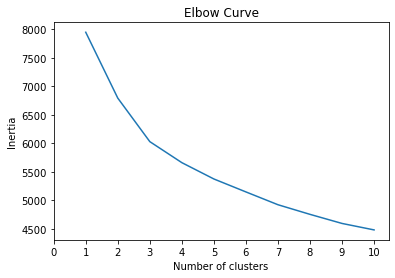

In [85]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Predicting clusters with k=3

In [109]:
# Initialize the k-means model
model3 = KMeans(n_clusters=3, random_state=0)

# Fit the model
model3.fit(df_X_pca)

# Predict clusters
predictions3 = model3.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca['y'] = label
df_X_pca["class"] = model3.labels_
df_X_pcs3 = df_X_pca.copy()
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class,y
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2,0


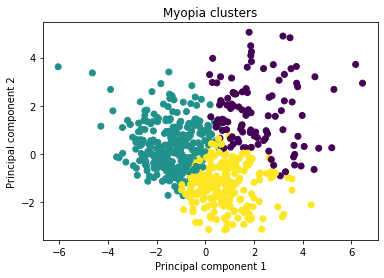

In [110]:
# Visualize the clusters
# only choosing 2 of the 10 components
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

## Predicting clusters with k=4

In [89]:
# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


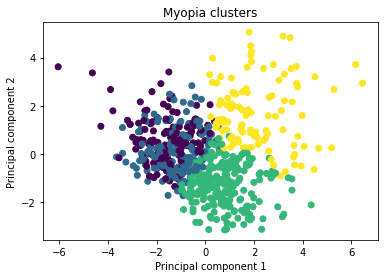

In [90]:
# Visualize the clusters
# only choosing 2 of the 10 components
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

## Predicting clusters with k=5

In [91]:
# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


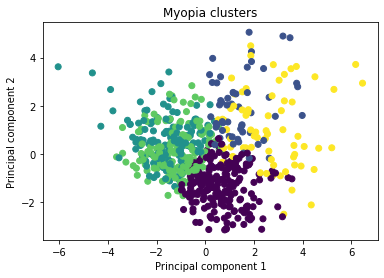

In [92]:
# Visualize the clusters
# only choosing 2 of the 10 components
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()